## Dependencies and Setup

In [ ]:
# !pip install tensorflow-federated
# !pip install tensorboard

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_federated as tff
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
SEED = 42
tf.random.set_seed(SEED)

## This function call sets the seed for TensorFlow's random number generator.
## By doing this, you ensure that any operation involving randomness in TensorFlow will produce the same results
# every time you run the code, as long as the rest of the code and the environment remain unchanged.
## This includes operations like initializing the weights of a neural network, shuffling datasets, splitting data
# into training and testing sets, and other processes that involve randomness.

In [ ]:
df = pd.read_csv('encoded_data.csv')

## Exploratory Data Analysis

#### Exploring Use CaseType (Input 1)

In [ ]:
df['Use CaseType (Input 1)'].value_counts()

Use CaseType (Input 1)
1    48
2    34
4    26
3    25
8    22
7    16
6    16
5    13
Name: count, dtype: int64

<Axes: xlabel='Use CaseType (Input 1)', ylabel='count'>

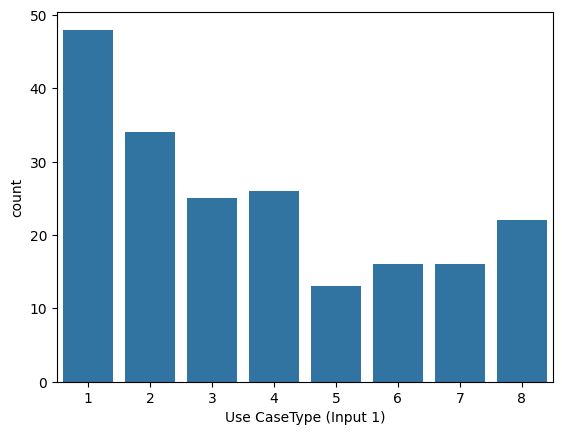

In [ ]:
sns.countplot(x = 'Use CaseType (Input 1)',data=df)

#### Exploring LTE/5G UE Category (Input 2)

In [ ]:
df['LTE/5G UE Category (Input 2)'].value_counts()

LTE/5G UE Category (Input 2)
19    16
12    16
20    15
15    15
17    13
6     12
11    11
14    10
4     10
8      9
10     9
18     9
1      9
2      8
9      7
7      7
13     7
3      6
5      5
16     3
0      3
Name: count, dtype: int64

<Axes: xlabel='LTE/5G UE Category (Input 2)', ylabel='count'>

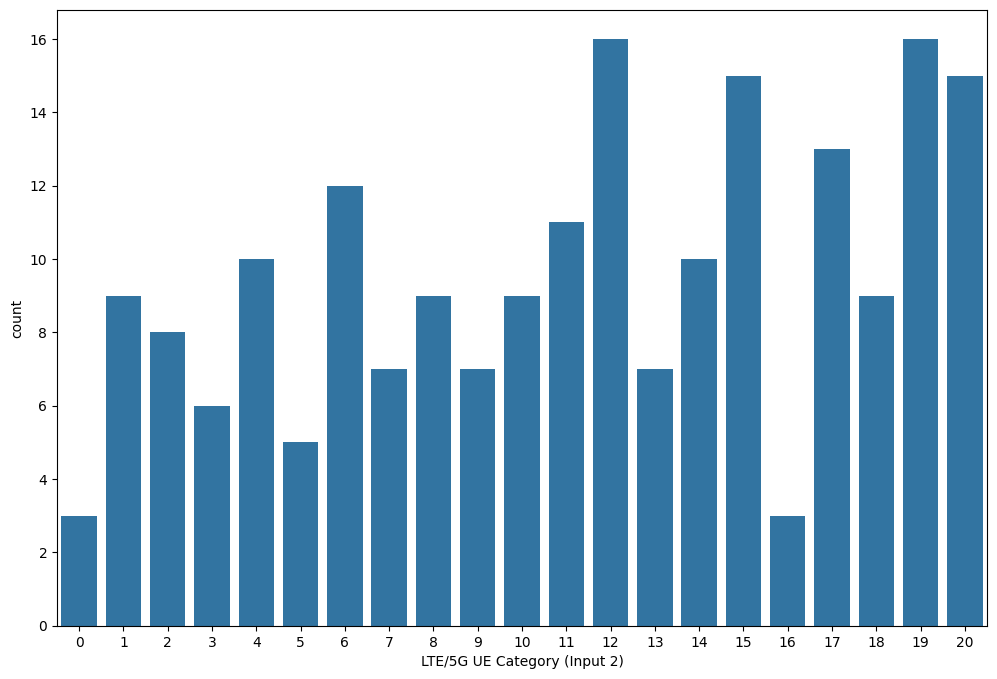

In [ ]:
plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'LTE/5G UE Category (Input 2)',data=df)

#### Exploring Technology Supported (Input 3)

In [ ]:
df['Technology Supported (Input 3)'].value_counts()

Technology Supported (Input 3)
0    127
1     73
Name: count, dtype: int64

<Axes: xlabel='Technology Supported (Input 3)', ylabel='count'>

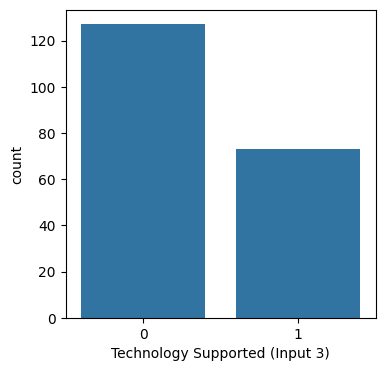

In [ ]:
plt.figure(figsize=(4, 4))  # Width and height in inches
sns.countplot(x = 'Technology Supported (Input 3)',data=df)

#### Exploring Day (Input4)

In [ ]:
df['Day (Input4)'].value_counts()

Day (Input4)
0    34
6    31
4    29
2    28
1    28
3    27
5    23
Name: count, dtype: int64

<Axes: xlabel='Day (Input4)', ylabel='count'>

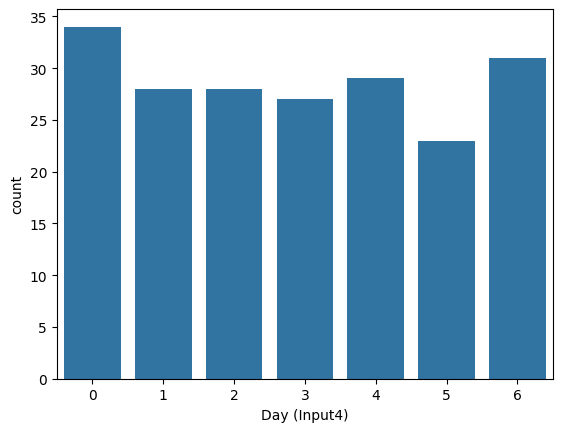

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'Day (Input4)',data=df)

#### Exploring Time (Input 5)

<Axes: xlabel='Time (Input 5)', ylabel='count'>

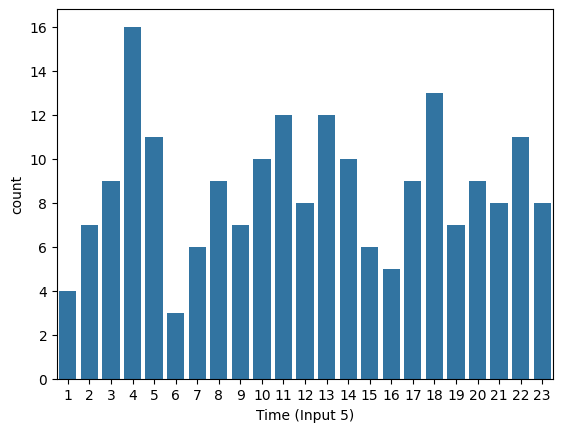

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'Time (Input 5)',data=df)

#### Exploring QCI (Input 6)

<Axes: xlabel='QCI (Input 6)', ylabel='count'>

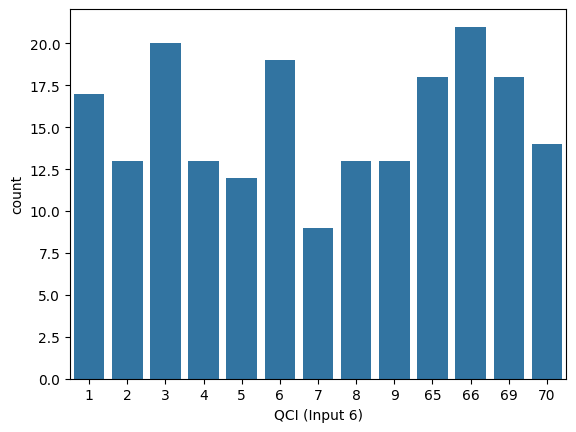

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'QCI (Input 6)',data=df)

#### Exploring Packet Loss Rate (Reliability)

<Axes: xlabel='Packet Loss Rate (Reliability)', ylabel='count'>

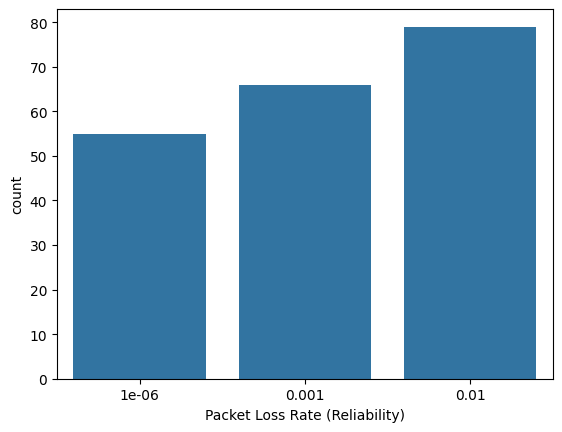

In [ ]:
#plt.figure(figsize=(12, 8))  # Width and height in inches
sns.countplot(x = 'Packet Loss Rate (Reliability)',data=df)

#### Exploring Packet Delay Budget (Latency)

In [ ]:
df['Packet Delay Budget (Latency)'].value_counts()

Packet Delay Budget (Latency)
0    85
1    67
2    48
Name: count, dtype: int64

<Axes: xlabel='Packet Delay Budget (Latency)', ylabel='count'>

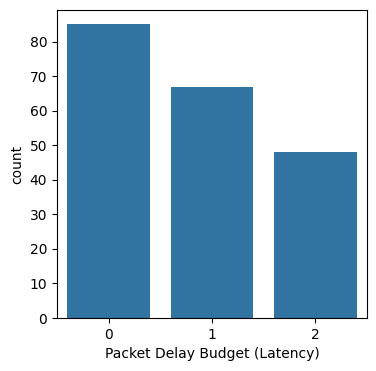

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x = 'Packet Delay Budget (Latency)',data=df)

## Coorelation Matrix and Feature Analysis

#### Coorelation Matrix

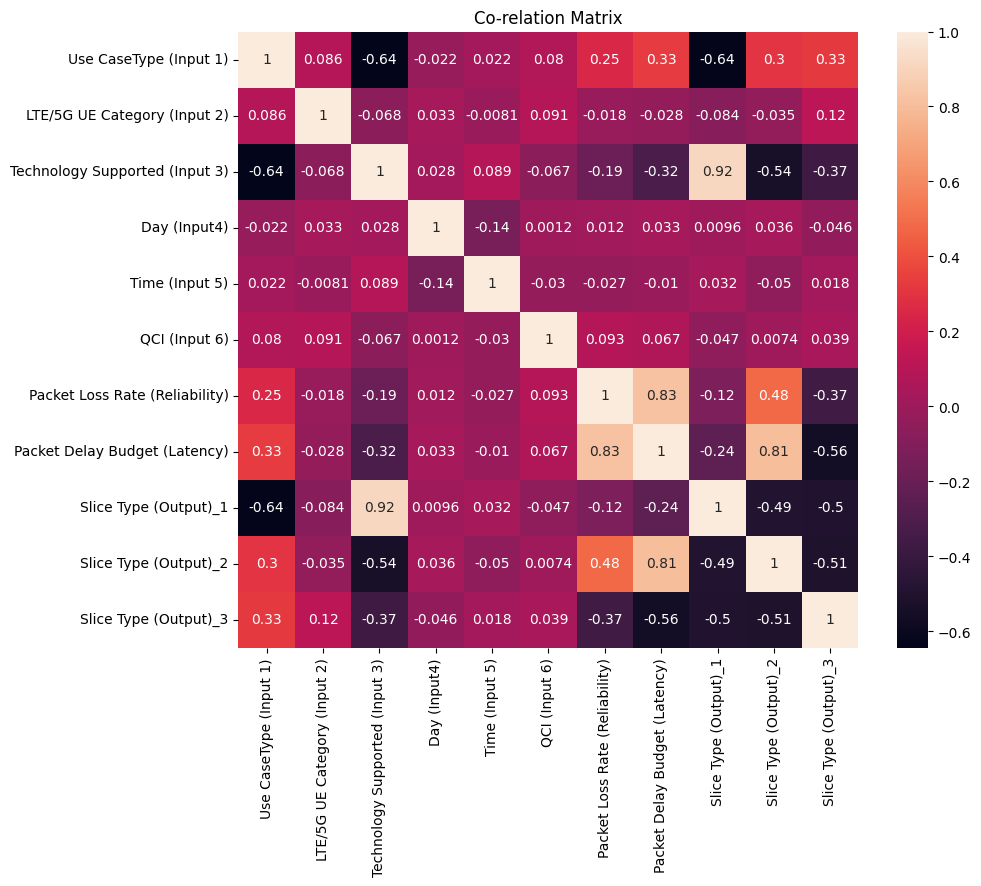

In [ ]:
corr_results = df.corr()
fig = plt.figure(figsize = (10,8))

sns.heatmap(corr_results,annot = True)
plt.title('Co-relation Matrix')
plt.show()
plt.show()

#### Important Features

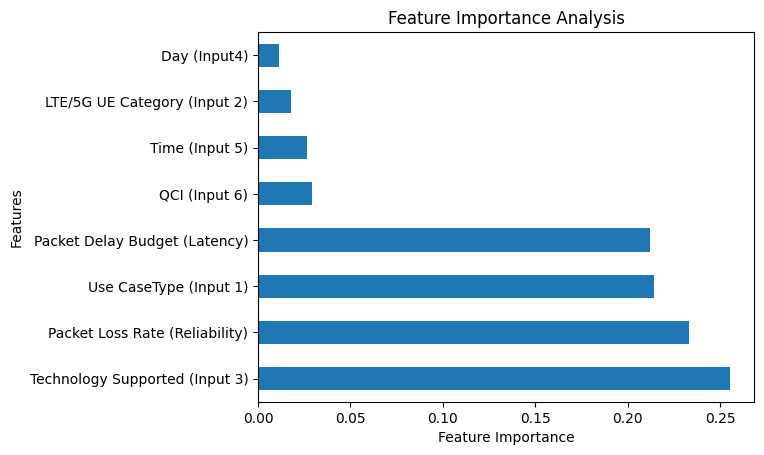

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Load the data
X = df

# Select relevant columns and drop any rows with missing values
X = X[['Use CaseType (Input 1)', 'LTE/5G UE Category (Input 2)', 'Technology Supported (Input 3)', 'Day (Input4)', 'Time (Input 5)', 'QCI (Input 6)', 'Packet Loss Rate (Reliability)', 'Packet Delay Budget (Latency)']].dropna()

# Separate features and target variable
columns_to_pop = ['Slice Type (Output)_1', 'Slice Type (Output)_2', 'Slice Type (Output)_3']
y = df[columns_to_pop]
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importances
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(13)
   .plot(kind='barh'))

# Show the plot
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()


## Federated Learning Approach

In [ ]:
df.head()

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)_1,Slice Type (Output)_2,Slice Type (Output)_3
0,4,19,0,3,21,3,0.010000,2,0,1,0
1,2,18,0,2,13,4,0.000001,0,0,0,1
2,1,19,1,5,19,2,0.001000,0,1,0,0
3,7,20,0,3,15,66,0.000001,0,0,0,1
4,1,15,1,2,17,6,0.001000,0,1,0,0


#### Splitting Data For 2 Clients

In [ ]:
client1_df = df[:len(df.index)//2]
client2_df = df[len(df.index)//2:]

# `len(df.index)` is commonly used to determine the number of rows in a DataFrame `df`

In [ ]:
print(len(df.index))

200


In [ ]:
print(len(client1_df))
print(len(client2_df))

100
100


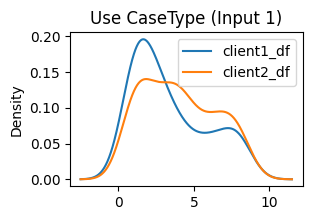

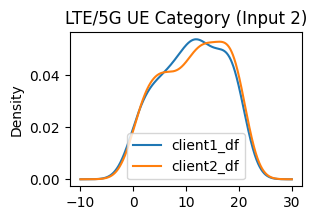

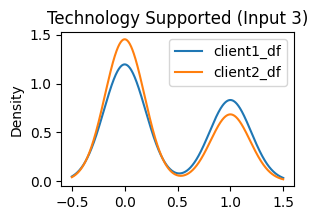

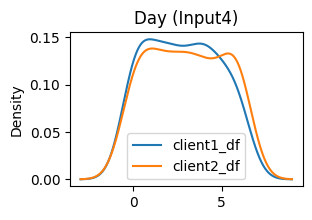

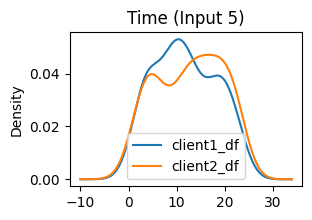

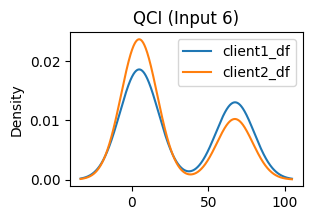

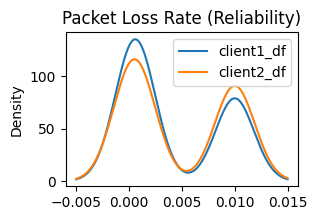

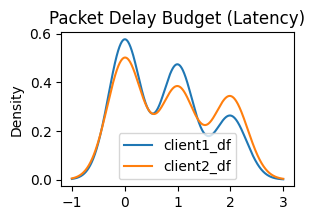

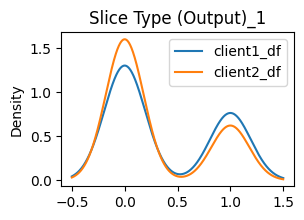

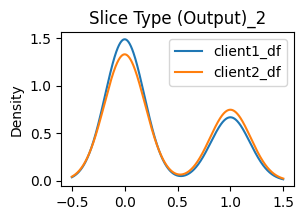

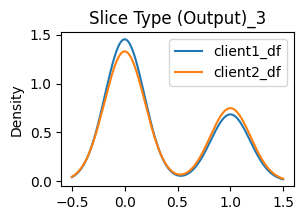

In [ ]:
import matplotlib.pyplot as plt

#Seed for reproducibility
np.random.seed(SEED)

for col in df.columns:
    # Combine the dataframes of the clients for the specific column, excluding 'Slice Type (Output)'
    combined = pd.concat([
        client1_df[col].reset_index(drop=True),
        client2_df[col].reset_index(drop=True)
    ], axis=1, ignore_index=True)

    # Add a small amount of noise to each column to prevent singular covariance matrix
    combined = combined + np.random.normal(0, 1e-6, combined.shape)

    # Create the plot
    fig, ax = plt.subplots(figsize=(3, 2))

    # Plot the density of all the rows (since there are only 40 rows per client)
    combined.plot(kind='density', ax=ax)

    # Set the title and legend
    ax.set_title(col)
    ax.legend(['client1_df', 'client2_df'])
    plt.show()


#### Data Loading

In [ ]:
EPOCHS = 80
BATCH_SIZE = 20

The function make_tf_dataset converts a Pandas DataFrame into a TensorFlow Dataset (tf.data.Dataset). It also balances the dataset based on a specified ratio of negative to positive samples, shuffles the data, and optionally batches it. This is useful for preparing data for training machine learning models, particularly in scenarios with imbalanced classes.

In [ ]:
df.head(2)

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)_1,Slice Type (Output)_2,Slice Type (Output)_3
0,4,19,0,3,21,3,0.010000,2,0,1,0
1,2,18,0,2,13,4,0.000001,0,0,0,1


In [ ]:
def make_tf_dataset(dataframe, batch_size=None):
    # Separates the Class column as the target variable y and the rest of the DataFrame as features.
    columns_to_pop = ['Slice Type (Output)_1', 'Slice Type (Output)_2', 'Slice Type (Output)_3']
    y = dataframe[columns_to_pop]
    X = dataframe.drop(columns=columns_to_pop)

    # Dataset creation and batching (Converts the features and labels into a TensorFlow Dataset)
    dataset = tf.data.Dataset.from_tensor_slices((X.values, y.values))

    # Shuffles the dataset to ensure the order of examples does not affect the training process.
    dataset = dataset.shuffle(200, seed=SEED)

    # Batches the dataset if batch_size is specified. Batching helps in efficient computation and training by processing multiple samples at once.
    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

In [ ]:
train_data, val_data = [], []
# Loops over the data for each client (in this case, Alice and Bob).
for client_data in [client1_df, client2_df]:
    train_df, val_df = train_test_split(client_data, test_size=0.1, random_state=SEED)

    # Scaling (Standardization actually hurts performance)
    scaler = MinMaxScaler()
    train_features = scaler.fit_transform(train_df.drop(['Slice Type (Output)_1', 'Slice Type (Output)_2', 'Slice Type (Output)_3'], axis=1))
    val_features = scaler.transform(val_df.drop(['Slice Type (Output)_1', 'Slice Type (Output)_2', 'Slice Type (Output)_3'], axis=1))

    # Assign scaled or transformed features back to the original training and validation DataFrames (train_df and val_df)
    train_df[train_df.columns.difference(['Slice Type (Output)_1', 'Slice Type (Output)_2', 'Slice Type (Output)_3'])] = train_features
    val_df[val_df.columns.difference(['Slice Type (Output)_1', 'Slice Type (Output)_2', 'Slice Type (Output)_3'])] = val_features

    # TF Datasets
    train_data.append(make_tf_dataset(train_df, batch_size=BATCH_SIZE))
    val_data.append(make_tf_dataset(val_df, batch_size=1))

In [ ]:
train_data

[<_BatchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>]

In [ ]:
val_data

[<_BatchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 3), dtype=tf.int64, name=None))>]

## Buliding Federated Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

def input_spec():
    return (
        tf.TensorSpec([None, 8], tf.float64),
        tf.TensorSpec([None,3], tf.int64)
    )

def model_fn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(8,)),
        tf.keras.layers.Dense(8,activation = "relu"),
        tf.keras.layers.Dense(8,activation = "relu"),
        tf.keras.layers.Dense(8,activation = "relu"),
        tf.keras.layers.Dense(3,activation = "softmax")
    ])

    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[CategoricalAccuracy(), Precision(), Recall()])

In [ ]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam()
)

state = trainer.initialize()
train_hist = []
for i in range(EPOCHS):
    state, metrics = trainer.next(state, train_data)
    train_hist.append(metrics)

    print(f"\rRun {i+1}/{EPOCHS}", end="")

Run 80/80

In [ ]:
evaluator = tff.learning.algorithms.build_fed_eval(model_fn)

In [ ]:
evaluation_state = evaluator.initialize()
model_weights = trainer.get_model_weights(state)
evaluation_state = evaluator.set_model_weights(evaluation_state, model_weights)

In [ ]:
evaluation_output = evaluator.next(evaluation_state, val_data)

In [ ]:
str(evaluation_output.metrics)

"OrderedDict([('distributor', ()), ('client_work', OrderedDict([('eval', OrderedDict([('current_round_metrics', OrderedDict([('categorical_accuracy', 0.65), ('precision', 0.0), ('recall', 0.0), ('loss', 0.98396665), ('num_examples', 20), ('num_batches', 20)])), ('total_rounds_metrics', OrderedDict([('categorical_accuracy', 0.65), ('precision', 0.0), ('recall', 0.0), ('loss', 0.98396665), ('num_examples', 20), ('num_batches', 20)]))]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', ())])"

In [ ]:
print(f"---Federated model metrics---\n{dict(evaluation_output.metrics['client_work']['eval']['total_rounds_metrics'])}")

---Federated model metrics---
{'categorical_accuracy': 0.65, 'precision': 0.0, 'recall': 0.0, 'loss': 0.98396665, 'num_examples': 20, 'num_batches': 20}
